<a href="https://colab.research.google.com/github/youuRee/DeepLearning_Lecture/blob/main/Ch_04_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EC%9D%B4%EB%A1%A0_%EB%B0%8F_%EC%8B%A4%EC%8A%B5_Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch

Pytorch는 TensorFlow와 함께 Deep Learning에서 가장 널리 사용되는 framework입니다.

초기에는 Torch라는 이름으로 Lua 언어 기반으로 만들어졌으나, 이후 python 기반으로 변경한 것이 Pytorch입니다. 

New York 대학교와 Facebook이 공동으로 만들었고, Deep Learning 연구자들 사이에서는 가장 대중적으로 널리 사용되는 framework입니다.

## Pytorch Basic

### Pytorch import

In [ ]:
import torch

print(torch.__version__)

1.11.0+cu113


### Pytorch 맛보기



In [ ]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## MNIST Data down 받기

# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [ ]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
# pytorch -> 디바이스에 대한 설정 필요
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),            
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# Loss 함수와 Optimizer 설정
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Training을 위한 함수
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
# Test를 위한 함수
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309988  [    0/60000]
loss: 0.472944  [ 6400/60000]
loss: 0.313130  [12800/60000]
loss: 0.377127  [19200/60000]
loss: 0.248622  [25600/60000]
loss: 0.356273  [32000/60000]
loss: 0.155636  [38400/60000]
loss: 0.339194  [44800/60000]
loss: 0.284508  [51200/60000]
loss: 0.311086  [57600/60000]
Test Error: 
 Accuracy: 93.9%, Avg loss: 0.200620 

Epoch 2
-------------------------------
loss: 0.136589  [    0/60000]
loss: 0.179708  [ 6400/60000]
loss: 0.114334  [12800/60000]
loss: 0.198402  [19200/60000]
loss: 0.164440  [25600/60000]
loss: 0.286637  [32000/60000]
loss: 0.061954  [38400/60000]
loss: 0.246030  [44800/60000]
loss: 0.174127  [51200/60000]
loss: 0.218340  [57600/60000]
Test Error: 
 Accuracy: 96.0%, Avg loss: 0.131613 

Epoch 3
-------------------------------
loss: 0.080493  [    0/60000]
loss: 0.100114  [ 6400/60000]
loss: 0.077899  [12800/60000]
loss: 0.114142  [19200/60000]
loss: 0.123165  [25600/60000]
loss: 0.209770  [32000/600

내가 쓴 손글씨로 Test 해봅시다.

Colab을 쓰는 경우에는 아래 cell을 실행하면 파일을 업로드할 수 있습니다.

그림판과 같은 도구를 이용하여 손으로 숫자를 쓴 다음 파일로 저장하고 업로드 합니다.

이 때 파일명은 image.png로 합니다.

In [ ]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')
# image file 읽기
cur_img = Image.open(img_path)
# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass
# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)
# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.
# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
image = torch.as_tensor(image).to(device).reshape(1,1,28,28)
model.eval()
predict = model(image)
print("Model이 예측한 값은 {} 입니다.".format(predict.argmax(1).item()))

### Tensor

텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

In [ ]:
# list로부터 직접 tensor 생성하기 
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# numpy array로부터 tensor 생성하기
np_array = np.array(data)
x_np_1 = torch.tensor(np_array)
print(x_np_1)

tensor([[1, 2],
        [3, 4]])


In [ ]:
x_np_2 = torch.as_tensor(np_array)
print(x_np_2)

tensor([[1, 2],
        [3, 4]])


In [ ]:
x_np_3 = torch.from_numpy(np_array)
print(x_np_3)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# x_np_1 : copy    x_np_2, x_np_3 : view
x_np_1[0,0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [ ]:
x_np_2[0,0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]])
[[6 2]
 [3 4]]


In [ ]:
x_np_3[0,0] = 7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]])
[[7 2]
 [3 4]]


In [ ]:
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


In [ ]:
a = torch.ones(2,3)
b = torch.zeros(2,3)
c = torch.full((2,3), 2)
d = torch.empty(2,3)
print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[1.4516e-32, 0.0000e+00, 1.1539e-32],
        [0.0000e+00, 7.3237e-34, 0.0000e+00]])


In [ ]:
e = torch.zeros_like(c)
f = torch.ones_like(c)
g = torch.full_like(c, 3)
h = torch.empty_like(c)
print(e)
print(f)
print(g)
print(h)

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[          177650944,                  24,          4294967295],
        [8171062582517395298, 8243662592152856949, 7310305785198503009]])


In [ ]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [ ]:
j = torch.arange(10)
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
k = torch.rand(2,2)
l = torch.randn(2,2)
print(k)
print(l)

tensor([[0.5587, 0.6343],
        [0.0332, 0.5469]])
tensor([[-0.1748,  0.0909],
        [-0.5145,  0.1114]])


#### Tensor의 속성

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# 속성 변경
tensor = tensor.reshape(4,3)
tensor = tensor.int()
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([4, 3])
Datatype of tensor: torch.int32
Device tensor is stored on: cuda:0


### Indexing과 Slicing

In [ ]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [ ]:
# indexing
print(a[1])
print(a[0,-1])

tensor([5, 6, 7, 8])
tensor(4)


In [ ]:
# slicing
print(a[1:-1])
print(a[:2, 2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


### Transpose

In [ ]:
a = torch.arange(16).reshape(2,2,4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [ ]:
b = a.transpose(1, 2)
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [ ]:
c = a.permute((2, 0, 1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### Tensor 연산

In [ ]:
x = torch.tensor([[1,2], [3,4]], dtype=torch.float32)
y = torch.tensor([[5,6], [7,8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [ ]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*30)
print(torch.add(x, y))
print(torch.subtract(x, y))
print(torch.multiply(x, y))
print(torch.divide(x, y))
print(torch.matmul(x, y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [ ]:
# in-place 연산
print(x.add(y)) # x + y, x값은 그대로
print(x)
print(x.add_(y)) # _ 있으면 x값도 변경됨
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [ ]:
z = torch.arange(1, 11).reshape(2, 5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [ ]:
sum1 = torch.sum(z, axis=0)
sum2 = torch.sum(z, axis=1)
sum3 = torch.sum(z, axis=-1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [ ]:
a = torch.arange(24).reshape(4, 6)
b = a.clone().detach() # clone().detach() : b가 a를 복사
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])


In [ ]:
c = torch.cat([a, b], axis=0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [ ]:
c = torch.cat([a, b], axis=-1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


In [ ]:
d = torch.stack([a, b], axis=0) # stack : 축을 하나 더 만들어냄
print(d, d.shape)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]]) torch.Size([2, 4, 6])


In [ ]:
d = torch.stack([a, b], axis=-1)
print(d, d.shape)

tensor([[[ 0,  0],
         [ 1,  1],
         [ 2,  2],
         [ 3,  3],
         [ 4,  4],
         [ 5,  5]],

        [[ 6,  6],
         [ 7,  7],
         [ 8,  8],
         [ 9,  9],
         [10, 10],
         [11, 11]],

        [[12, 12],
         [13, 13],
         [14, 14],
         [15, 15],
         [16, 16],
         [17, 17]],

        [[18, 18],
         [19, 19],
         [20, 20],
         [21, 21],
         [22, 22],
         [23, 23]]]) torch.Size([4, 6, 2])


## Dataset / Dataloader

Data를 처리하여 model에 공급하는 방법으로 Pytorch에서는 Dataset과 DataLoader를 제공합니다.

Dataset은 data와 label을 저장하고, DataLoader는 Dataset을 model에 공급할 수 있도록 iterable 객체로 감싸줍니다.

### FasionMNIST data 불러오기

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr

In [ ]:
training_data = datasets.FashionMNIST(
    root="data", # root : 저장할 디렉토리의 이름
    train=True,
    download=True,
    transform=ToTensor() # 데이터 전처리, ToTensor() : 텐서로 변경, 0~1까지의 값으로
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 데이터 시각화하기

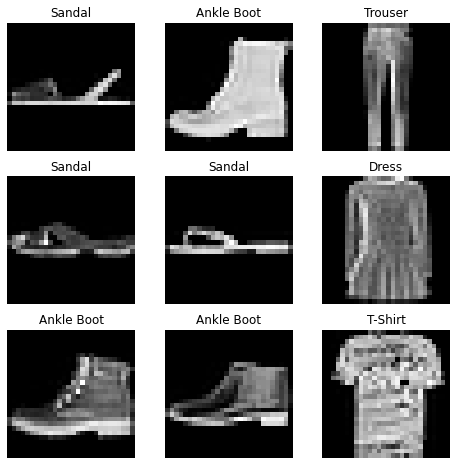

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### DataLoader 만들기

In [ ]:
# DataLoader 만들기
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


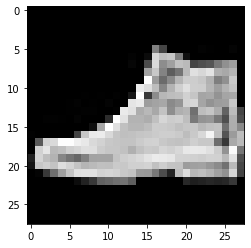

Label: 9


In [ ]:
# DataLoader를 통해 반복하기(iterate)
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# pytorch -> 채널 기본적으로 만들어줌
# But matplotlib에서는 채널이 없어야 그려짐 -> 채널을 없애주는 squeeze() 사용
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Custom Dataset, Data Loader 만들기

In [ ]:
# 간단한 Custom Dataset/Transform/DataLoader 만들기

class CustomDataset(Dataset):
  def __init__(self, np_data, transform=None): # data 받아오기
    self.data = np_data
    self.transform = transform
    self.len = np_data.shape[0]
  def __len__(self): # data 전체 개수 알려줌
    return self.len
  def __getitem__(self, idx): # idx에 해당되는 item을 리턴   
    sample = self.data[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [ ]:
def square(sample):
  return sample**2

In [ ]:
trans = tr.Compose([square]) # data의 transform 설정

In [ ]:
np_data = np.arange(10)

custom_dataset = CustomDataset(np_data, transform=trans)

In [ ]:
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [ ]:
for _ in range(3):
  for data in custom_dataloader:
    print(data)
  print("="*20)

tensor([ 9, 16])
tensor([ 0, 64])
tensor([49, 81])
tensor([4, 1])
tensor([36, 25])
tensor([36, 49])
tensor([81, 25])
tensor([4, 0])
tensor([64,  1])
tensor([ 9, 16])
tensor([64, 81])
tensor([16,  1])
tensor([25, 36])
tensor([ 4, 49])
tensor([9, 0])


## Model

In [ ]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Model class 만들기

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),            
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# Model instance 생성, device 설정
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# 가상의 data 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0], device='cuda:0')


## Training / Validation

#### Loss Function

In [ ]:
# 손실 함수를 초기화합니다.
loss_fn = nn.CrossEntropyLoss()

### Optimizer

In [ ]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # optimizer : w, b update

### Training / Validation(Test) Function

In [ ]:
# Training을 위한 함수
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # w, b  한번씩 update

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Test를 위한 함수
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item() # item() : 스칼라 -> loss, accuracy에서 많이씀
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# 학습 진행하기
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.284901  [    0/60000]
loss: 0.734868  [ 6400/60000]
loss: 0.587672  [12800/60000]
loss: 0.681301  [19200/60000]
loss: 0.377136  [25600/60000]
loss: 0.426860  [32000/60000]
loss: 0.393427  [38400/60000]
loss: 0.494770  [44800/60000]
loss: 0.581516  [51200/60000]
loss: 0.499922  [57600/60000]
Test Error: 
 Accuracy: 82.8%, Avg loss: 0.476092 

Epoch 2
-------------------------------
loss: 0.313921  [    0/60000]
loss: 0.411912  [ 6400/60000]
loss: 0.386883  [12800/60000]
loss: 0.408415  [19200/60000]
loss: 0.462366  [25600/60000]
loss: 0.351059  [32000/60000]
loss: 0.343304  [38400/60000]
loss: 0.398150  [44800/60000]
loss: 0.325980  [51200/60000]
loss: 0.427454  [57600/60000]
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.445756 

Epoch 3
-------------------------------
loss: 0.312291  [    0/60000]
loss: 0.380417  [ 6400/60000]
loss: 0.530779  [12800/60000]
loss: 0.439627  [19200/60000]
loss: 0.397562  [25600/60000]
loss: 0.282300  [32000/600

## Model 저장하고 불러오기

#### parameter만 저장하고 불러오기

In [ ]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
# 새 Model instance 생성, device 설정
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [ ]:
# test
model2.eval() # eval() : training 안한다는 것을 알려줌
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 8.8%, Avg loss: 2.332707 



In [ ]:
# 저장한 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [ ]:
# test
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 87.9%, Avg loss: 0.332399 



### Model 전체를 저장하고 불러오기

In [ ]:
# 저장하기
torch.save(model, 'model.pth')

In [ ]:
# 불러오기
model3 = torch.load('model.pth')

In [ ]:
# test
model3.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 87.9%, Avg loss: 0.332399 



## Tensorboard 사용하여 시각화하기

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./logs/pytorch')

In [ ]:
# 새 Model instance 생성, device 설정
model4 = NeuralNetwork().to(device)
print(model4)

model4.eval()
test_loop(test_dataloader, model4, loss_fn)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
Test Error: 
 Accuracy: 7.6%, Avg loss: 2.309033 



In [ ]:
X = torch.rand(1, 28, 28, device=device)
writer.add_graph(model4, X) # 모델과 입력 넣어주면 tensorboard에 그려줌

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X) # batch 단위의 loss (batch=64개, 64개에 대한 loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
        total_loss += loss / len(dataloader) # data 전체의 loss 평균
    return total_loss

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [ ]:
parameters = ['Weight1', 'Bias1', 'Weight2', 'Bias2']

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    writer.add_scalar('training loss', train_loss, t)
    for param, name in zip(model.parameters(), parameters):
        writer.add_histogram(name, param, t)
    test_loss = test(test_dataloader, model, loss_fn)
    writer.add_scalar('test_loss', test_loss, t)
print("Done!")

Epoch 1
-------------------------------
loss: 0.268006  [    0/60000]
loss: 0.281039  [ 6400/60000]
loss: 0.308223  [12800/60000]
loss: 0.255364  [19200/60000]
loss: 0.158929  [25600/60000]
loss: 0.386074  [32000/60000]
loss: 0.379566  [38400/60000]
loss: 0.270723  [44800/60000]
loss: 0.283389  [51200/60000]
loss: 0.233395  [57600/60000]
Test Error: 
 Accuracy: 88.0%, Avg loss: 0.330266 

Epoch 2
-------------------------------
loss: 0.302679  [    0/60000]
loss: 0.433080  [ 6400/60000]
loss: 0.305837  [12800/60000]
loss: 0.255838  [19200/60000]
loss: 0.362909  [25600/60000]
loss: 0.380864  [32000/60000]
loss: 0.468968  [38400/60000]
loss: 0.164874  [44800/60000]
loss: 0.195580  [51200/60000]
loss: 0.282977  [57600/60000]
Test Error: 
 Accuracy: 87.7%, Avg loss: 0.342331 

Epoch 3
-------------------------------
loss: 0.168741  [    0/60000]
loss: 0.211411  [ 6400/60000]
loss: 0.324171  [12800/60000]
loss: 0.240300  [19200/60000]
loss: 0.265921  [25600/60000]
loss: 0.111026  [32000/600

In [ ]:
writer.close()

In [ ]:
%tensorboard --logdir './logs/pytorch'